# "Телеком"

## Изучение и предобработка данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.utils import shuffle

#from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# чтение файлов с данными и сохранение в df с использованием конструкции try-except
try:
    df_contr = pd.read_csv('C:/Users/datasets/contract.csv')  # локальный путь
    df_pers = pd.read_csv('C:/Users/datasets/personal.csv')
    df_int = pd.read_csv('C:/Users/datasets/internet.csv')
    df_phone = pd.read_csv('C:/Users/datasets/phone.csv')
except:
    df_contr = pd.read_csv('/datasets/final_provider/contract.csv')  # серверный путь
    df_pers = pd.read_csv('/datasets/final_provider/personal.csv')
    df_int = pd.read_csv('/datasets/final_provider/internet.csv')
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
# создание функции вывода основной информации о датасете
def information(df):
    display(df.head(5))
    print('')
    print(df.info())
    print('')
    display(df.describe())

In [4]:
# изучение данных о договоре
information(df_contr)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None



,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


По первому датасету можно сказать, что пропусков нет, следует изменить тип данных в столбце `TotalCharges` на числовой, а столбцы `BeginDate` и `EndDate` на datetime. Ну и для красоты можно во всех датасетах переименовать столбец с id клиента на CustomerID.

In [5]:
# изучение персональных данных клиента
information(df_pers)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None



,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Во втором датасете также отустствуют пропуски, количество объектов такое же. Стоит привести названия столбцов к единому стилю.

In [6]:
# изучение данных об интернет-услугах
information(df_int)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,4237-RLAQD,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


В данном датасете ситуация аналогична: пропусков нет, однако данные у нас имеются не по всем клиентам. Это стоит учесть при объединении таблиц в будущем. Все стобцы имеют тип данных object.

In [7]:
# изучение данных об услугах телефонии
information(df_phone)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,4945-RVMTE,No
freq,1,3390


В последнем датасете также не по всем клиентам данные, пропусков нет.

Теперь можем преступить к предобработке данных.

## Предобработка данных

In [8]:
# переименование столбцов
df_contr = df_contr.rename(columns={'customerID': 'CustomerID'})
df_pers = df_pers.rename(columns={'customerID': 'CustomerID', 'gender': 'Gender'})
df_int = df_int.rename(columns={'customerID': 'CustomerID'})
df_phone = df_phone.rename(columns={'customerID': 'CustomerID'})

df_pers.columns # проверка

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

Для удобства соединим все датасеты в один.

In [9]:
# соединение данных
df = df_contr.merge(df_pers, how='left', on='CustomerID').merge(df_int, how='left', on='CustomerID').merge(df_phone, how='left', on='CustomerID')

df = df.set_index('CustomerID') # CustomerID сделаем индексом

information(df)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
CustomerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No



<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   5517 non-null   object 
 12  OnlineSecurity    5517 non-null   object 
 13  OnlineBackup      5517 non-null   object 
 14  DeviceProtection  5517 non-null   object 
 15  TechSupport       5517 non-null   object 
 16  StreamingTV       5517 non-null

,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


После объединения таблиц, в данных появились пропуски. Скорее всего это произошло из-за того, что одни клиенты пользуются одними услугами, а другие другими. Поэтому в столбцах `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `MultipleLines` пропуски заменим на No.

In [10]:
# заполнение пропущенных значений на No
col = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for column in col:
    df[column] = df[column].fillna('No')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null 

Теперь перейдем к изменению типав данных.
В столбце `EndDate` сперва необходимо заменить значение No, иначе код выдаст ошибку. Заменим на дату выгрузки данных 2020-02-01, это будет означать, что клиент продолжает пользоваться услугами, что позволит создать новый столбец с целевым признаком, где 0 - это клиент продолжает пользоваться услугами, а 1 - клиент отказался пользоваться услугами компании.

In [11]:
# замена значения No на 2020-02-01
df['EndDate'] = df['EndDate'].replace('No', '2020-02-01')
df['EndDate'].head()

CustomerID
7590-VHVEG             2020-02-01
5575-GNVDE             2020-02-01
3668-QPYBK    2019-12-01 00:00:00
7795-CFOCW             2020-02-01
9237-HQITU    2019-11-01 00:00:00
Name: EndDate, dtype: object

In [12]:
# изменение типов данных
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors ='coerce')
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   Gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   7043 non-null   object        
 12  OnlineSecurity    7043 non-null   object        
 13  OnlineBackup      7043 non-null   object        
 14  DeviceProtecti

После изменения типа данных в столбце `TotalCharges` появились пропуски, посмотрим их и избавимся от них.

In [13]:
# срез данных с пропусками
df.query('TotalCharges.isna()')

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
CustomerID,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No
3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,No,No,No,No,No,No,No,No
5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes
1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No
7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,No
3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes
2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,No,No,No,No,No,No,No,No
2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,No


Из таблицы видно, что пропуски образовались в данных у тех клиентов, которые только начали пользоваться услугами компании (1 день). Заменим пропущенные значения на 0.

In [14]:
# замена пропусков на 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'].isna().sum()

0

Теперь создадим столбец с целевым признаком.

In [15]:
# создание столбца с целевым признаком
df['Outflow'] = (df['EndDate'] != '2020-02-01').astype(int)

df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Outflow
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0
3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,1
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0
9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,1


Так как у нас известна дата начала пользования услугами и дата окончания, найдем количество дней, которое клиент пользуется услугами.

In [16]:
# создание столбца
df['Duration'] = (df['EndDate'] - df['BeginDate']).dt.days

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   Gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   7043 non-null   object        
 12  OnlineSecurity    7043 non-null   object        
 13  OnlineBackup      7043 non-null   object        
 14  DeviceProtecti

## Исследовательский анализ данных

Для начала посмотрим, каково распределение для категориальных столбцов.

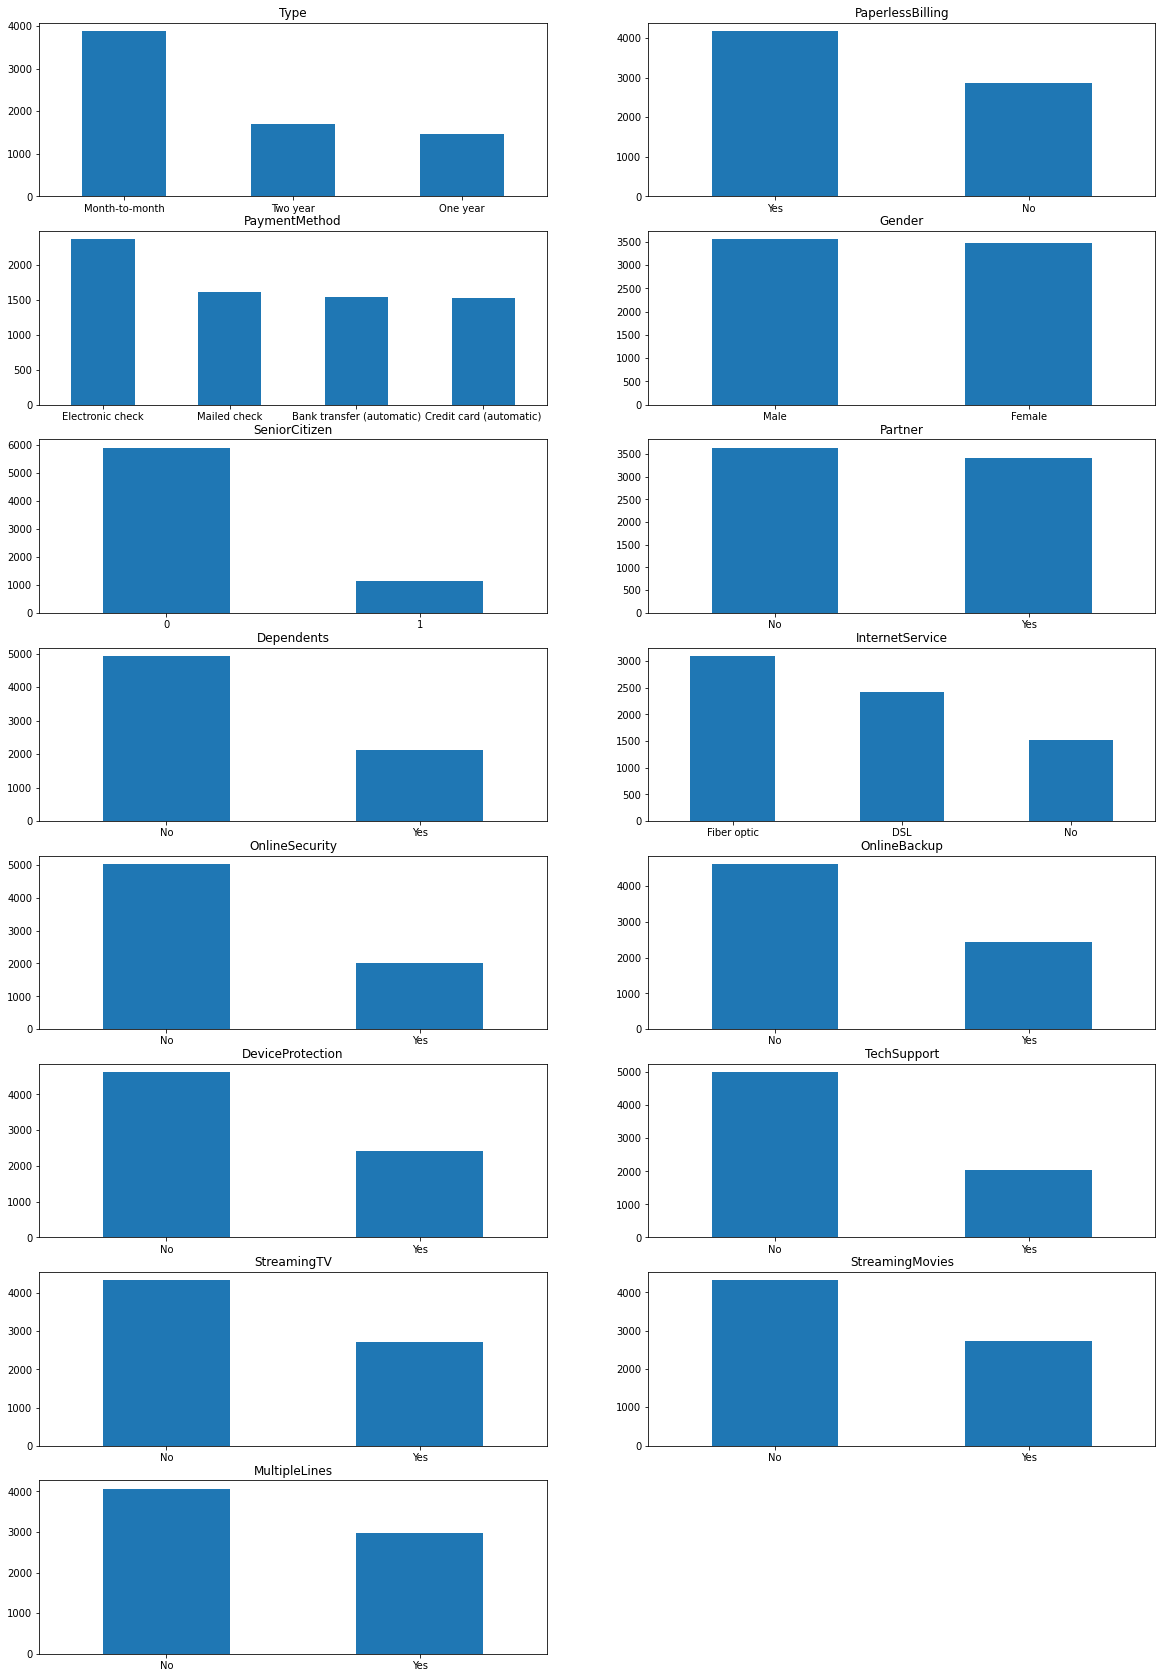

In [17]:
# столбчатые гистограммы для категориальных данных
cat_columns = ['Type', 'PaperlessBilling', 'PaymentMethod', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'MultipleLines']

plt.figure(figsize=(20, 30))
for idx, column in enumerate(cat_columns):
    ax = plt.subplot(8, 2, idx+1)
    df[column].value_counts().plot(kind='bar', title=column, ax=ax, rot=0)
plt.show()

Из графиков видно, что больше всего пользователей с ежемесячной оплатой, есть ряд услуг, которые не пользуются большим спросом, такие как блокировка небезопасных сайтов, облачное хранилище файлов, антивирус и т.д.

Теперь посмотрим распределение, а также построим "ящик с усами" для числовых данных.

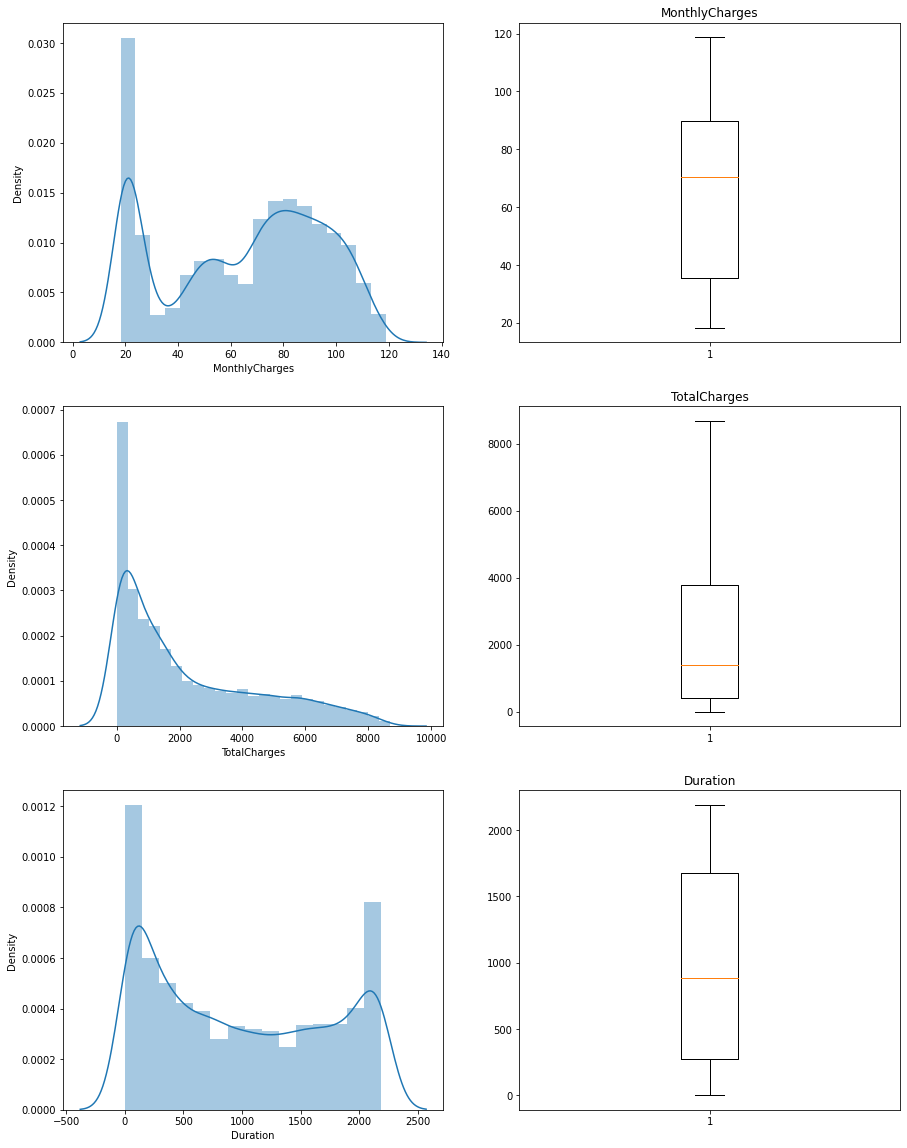

In [18]:
# гистограммы и ящик с усами для чтолбцов с числовыми данными
numeric_col = ['MonthlyCharges', 'TotalCharges', 'Duration']

plt.figure(figsize=(15, 20))

idx=-1
for col in numeric_col:
    idx+=2
    plt.subplot(3, 2, idx)
    sns.distplot(df[col])

idx=0
for col in numeric_col:
    idx+=2
    plt.subplot(3, 2, idx)
    plt.boxplot(df[col])
    plt.title(col)

plt.show()

На графике распределения MonthlyCharges видно, что имеется несколько пиков, что может говорить, например, о наличии категорий пользователей. Данные в столбце TotalCharges скошены вправо, а в столце Duration видно два пика - новые клиенты и постоянные, кто пользуется услугами уже длительное время.

Посмотрим, сколько составлет ежемесячная плата и количество дней пользованием услуг у клиентов, которые продолжают ими пользоваться и которые расторгнули договор.

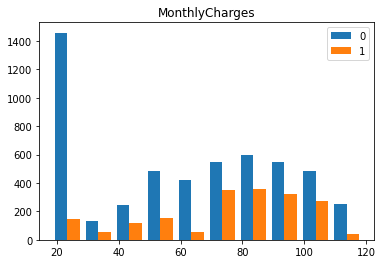

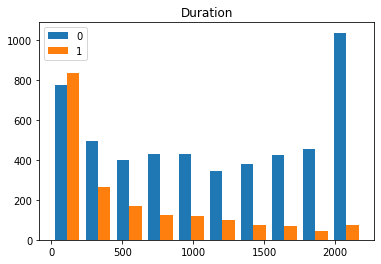

In [19]:
# построение столбчатых гистограмм 
a = list(df[df['Outflow']==0]['MonthlyCharges'])
b = list(df[df['Outflow']==1]['MonthlyCharges'])
c = list(df[df['Outflow']==0]['Duration'])
d = list(df[df['Outflow']==1]['Duration'])
names = ['0', '1']

plt.hist([a, b], label=names)
plt.title('MonthlyCharges')
plt.legend()
plt.show()

plt.hist([c, d], label=names)
plt.title('Duration')
plt.legend();

Отсюда мы видим, что чаще отказываются от услуг те клиенты, чья плата выше и кто пользуется услугами недавно.

Теперь посчитаем коэффициенты корреляции.

In [20]:
# расчет коэффициента корреляции
df[numeric_col].corr()

,MonthlyCharges,TotalCharges,Duration
MonthlyCharges,1.000000,0.651174,0.247754
TotalCharges,0.651174,1.000000,0.826109
Duration,0.247754,0.826109,1.000000


Мы видим высокую корреляцию между столбцами `TotalCharges` и `Duration`, а также `TotalCharges` и `MonthlyCharges`. Во избежания переобучения модели удалим столбец `TotalCharges` и сразу удалим ненужные для обучения столбцы `BeginDate` и `EndDate`.

In [21]:
# удаление столбцов
del df['BeginDate'], df['EndDate'], df['TotalCharges']

## Обучение моделей

Преобразуем категориальные признаки в числовые методом One Hot Encoding.

In [22]:
# OHE
df = pd.get_dummies(df, drop_first=True)
df.head()

,MonthlyCharges,SeniorCitizen,Outflow,Duration,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
CustomerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,29.85,0,0,31,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5575-GNVDE,56.95,0,0,1036,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3668-QPYBK,53.85,0,1,61,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
7795-CFOCW,42.30,0,0,1371,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
9237-HQITU,70.70,0,1,61,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


Создадим переменные с признаками и целевым признаком, а так же разделим данные на тренировочную и тестовую выборки.

In [23]:
# выделение фичей и целевого признака
target = df['Outflow'] 
features = df.drop(columns=['Outflow'])

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

Проверим, есть ли у нас дисбаланс классов

In [24]:
# проверка дисбалана классов
target_train.value_counts(normalize=True)

0    0.735895
1    0.264105
Name: Outflow, dtype: float64

Чтобы избавиться от дисбаланса воспользуемся методом upsampling. Для этого создадим функции, которая будет:
1. Разделять обучающую выборку на отрицательные и положительные объекты;
2. Копировать несколько раз положительные объекты;
3. С учётом полученных данных создаст новую обучающую выборку;
4. Перемешает данные.

In [25]:
# создание функции
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [26]:
features_train, target_train = upsample(features_train, target_train, 3)

In [27]:
# проверка
target_train.value_counts(normalize=True)

1    0.518459
0    0.481541
Name: Outflow, dtype: float64

Для обучения будем использовать следующие модели: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, CatBoostClassifier

0.8369675331700648


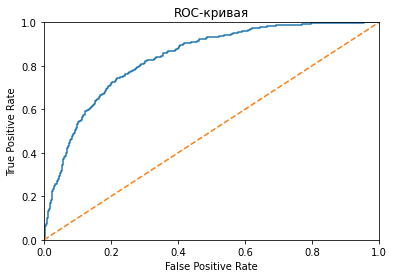

In [28]:
# LogisticRegression
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities = model.predict_proba(features_test) # рассчет вероятности классов
probabilities_one = probabilities[:, 1] # вероятность класса "1"
auc_roc = roc_auc_score(target_test, probabilities_one) # метрика AUC-ROC
print(auc_roc)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one) # кривая ошибок
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Гиперпараметры: {'max_depth': 20}
0.7084648825155153


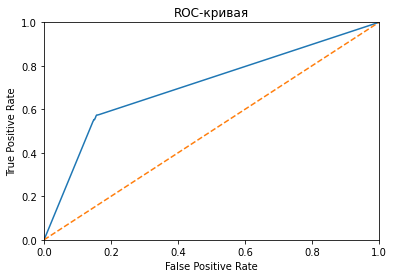

In [29]:
# DecisionTreeClassifier
param_grid = {'max_depth': range(2, 21)}
model = DecisionTreeClassifier(random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
search.fit(features_train, target_train)

print('Гиперпараметры: {}'.format(search.best_params_))

probabilities_one = search.best_estimator_.predict_proba(features_test)[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one)
print(auc_roc)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Гиперпараметры: {'max_depth': 14, 'n_estimators': 90}
0.8419541077768926


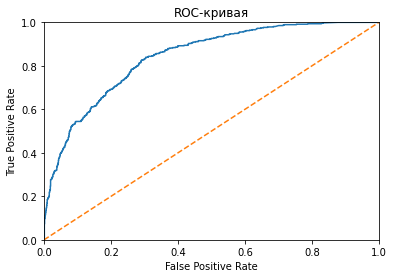

In [30]:
# RandomForestClassifier
param_grid = {'max_depth': range(2, 15),
              'n_estimators': range(10, 100, 10)}
model = RandomForestClassifier(random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
search.fit(features_train, target_train)

print('Гиперпараметры: {}'.format(search.best_params_))

probabilities_one = search.best_estimator_.predict_proba(features_test)[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one)
print(auc_roc)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Гиперпараметры: {'learning_rate': 0.3}
0.9141184647513763


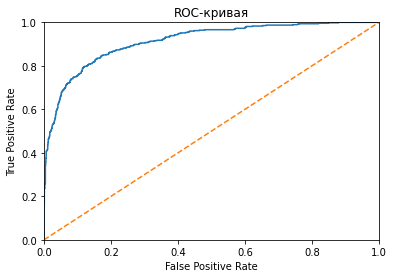

In [31]:
# CatBoostClassifier
param_grid = {'learning_rate': [x/10 for x in range(1, 6)]}
model = CatBoostClassifier(random_state=12345, verbose=False)
search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
search.fit(features_train, target_train)
print('Гиперпараметры: {}'.format(search.best_params_))

probabilities_one = search.best_estimator_.predict_proba(features_test)[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one) 
print(auc_roc)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Таким образом, лучший результат показала модель CatBoostClassifier со значением метрики ROC-AUC в 0.91.

**ВЫВОД**

Целью данной работы было создание модели по прогнозированию оттока клиентов. В ходе работы были изучены файлы с данными, а также проведена их предобработка, такая как: изменение типов данных, избавление от пропущенных значений и т.д. Анализ данных показал, что  чаще отказываются от услуг те клиенты, чья плата выше и кто пользуется услугами недавно. Была обнаружена высокая корреляция между столбцами TotalCharges и Duration, а также TotalCharges и MonthlyCharges. Поэтому столбец TotalCharges был удален, а также были удалены ненужные для обучения столбцы BeginDate и EndDate. Поскольку некоторые алгоритмы машинного обучения не могут работать напрямую с категориальными данными был применен метод one hot encoding. Для обучения были использованы следующие модели: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, CatBoostClassifier, послядняя из которых показала лучшее значение метрики ROC-AUC в 0.91.